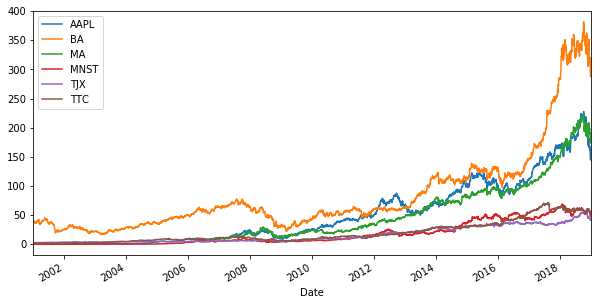

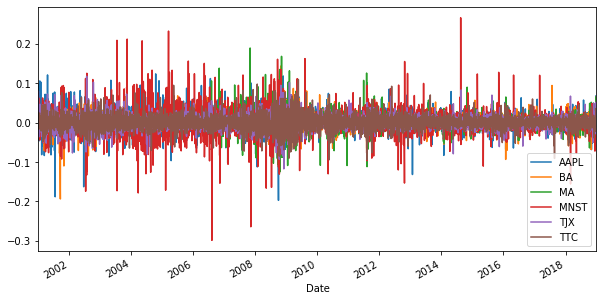

AAPL    0.285327
BA      0.114341
MA      0.300130
MNST    0.357968
TJX     0.154367
TTC     0.193959
dtype: float64
          AAPL        BA        MA      MNST       TJX       TTC
AAPL  0.134261  0.035106  0.048082  0.035043  0.030329  0.031111
BA    0.035106  0.084867  0.041850  0.028054  0.031135  0.033598
MA    0.048082  0.041850  0.116491  0.041652  0.037607  0.039127
MNST  0.035043  0.028054  0.041652  0.226871  0.022498  0.025527
TJX   0.030329  0.031135  0.037607  0.022498  0.073074  0.029436
TTC   0.031111  0.033598  0.039127  0.025527  0.029436  0.078213
Expected Portfolio Return 0.2711334697396912
Expected Portfolio Variance 0.25777962723046105


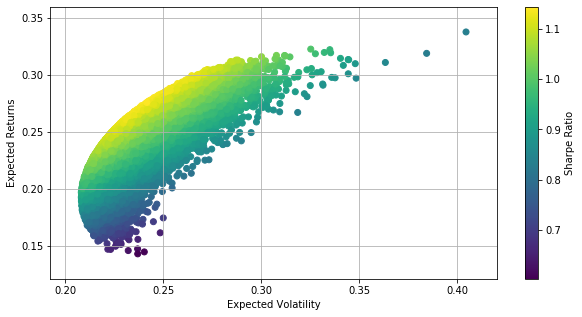

Optimal weights [0.234 0.    0.291 0.22  0.057 0.198]
Expected return,Expected Volatility,Sharpe Ratio: [0.28006006 0.24472582 1.14438296]


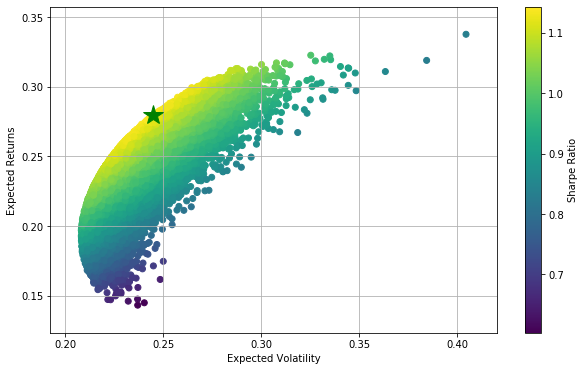

In [1]:
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#stocks=['AAPL','WMT','TSLA','GE','AMZN','DB']
stocks=['AAPL','BA','MA','MNST','TJX','TTC']
start_date='01/01/2001'
end_date='01/01/2019'

def download_stocks(stocks):
  data=web.DataReader(stocks,data_source='yahoo',start=start_date,end=end_date)['Adj Close']
  data.columns=stocks
  return data

def show_data(data):
  data.plot(figsize=(10,5))
  plt.show()

def returns(data):
  returns=np.log(data/data.shift(1))
  return returns

def plot_returns(returns):
   returns.plot(figsize=(10,5))
   plt.show()

def show_statistics(returns):
  print(returns.mean()*252)
  print(returns.cov()*252)

def initialize_weights():
  weights=np.random.random(len(stocks))
  weights/=np.sum(weights)
  return weights

def portfolio_return(returns,weights):
  portfolio_return=np.sum(returns.mean()*weights)*252
  print('Expected Portfolio Return',portfolio_return)

def portfolio_variance(returns,weights):
  portfolio_variance=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
  print('Expected Portfolio Variance',portfolio_variance)

def generate_portfolios(weights,returns):

  preturns=[]
  pvariances=[]

  for i in range(100000):
    weights=np.random.random(len(stocks))
    weights/=np.sum(weights)
    preturns.append(np.sum(returns.mean()*weights)*252)
    pvariances.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights))))

  preturns=np.array(preturns)
  pvariances=np.array(pvariances)

  return preturns,pvariances

def plot_portfolios(returns,variances):
  plt.figure(figsize=(10,5))
  plt.scatter(variances,returns,c=returns/variances,marker='o') #c=returns/variances
  plt.grid(True)
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Returns')
  plt.colorbar(label='Sharpe Ratio')
  plt.show()

def statistics(weights,returns):
  weights=np.array(weights)
  portfolio_return=np.sum(returns.mean()*weights)*252
  portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
  return np.array([portfolio_return,portfolio_volatility,portfolio_return/portfolio_volatility])

def min_func_sharpe(weights,returns):
  return -statistics(weights,returns)[2]

def optimize_portfolio(weights,returns):
  constraints=({'type':'eq','fun':lambda x:np.sum(x)-1})
  bounds=tuple((0,1) for x in range(len(stocks))) 
  optimum=minimize(fun=min_func_sharpe,x0=weights,args=returns,method='SLSQP',bounds=bounds,constraints=constraints)
  return optimum

def print_optimal_portfolio(optimum,returns):
  print("Optimal weights",optimum['x'].round(3))
  print("Expected return,Expected Volatility,Sharpe Ratio:", statistics(optimum['x'].round(3),returns))


def show_optimal_portfolio(optimum,returns,preturns,pvariances):
  plt.figure(figsize=(10,6))
  plt.scatter(pvariances,preturns,c=preturns/pvariances,marker='o')
  plt.grid(True)
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Returns')
  plt.colorbar(label='Sharpe Ratio')
  plt.plot(statistics(optimum['x'],returns)[1],statistics(optimum['x'],returns)[0],'g*',markersize=20.0)
  plt.show()

if __name__=="__main__":
  data=download_stocks(stocks)
  show_data(data)
  returns=returns(data)
  plot_returns(returns)
  show_statistics(returns)
  weights=initialize_weights()
  portfolio_returns=portfolio_return(returns,weights)
  portfolio_variance=portfolio_variance(returns,weights)
  preturns,pvariances=generate_portfolios(weights,returns)
  plot_portfolios(preturns,pvariances)
  optimum=optimize_portfolio(weights,returns)
  print_optimal_portfolio(optimum,returns)
  show_optimal_portfolio(optimum,returns,preturns,pvariances)
